## Clone the GitHub Repo

In [45]:
!git clone https://github.com/bhargav-borah/CIFAR10ImageClassification

Cloning into 'CIFAR10ImageClassification'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 77 (delta 7), reused 0 (delta 0), pack-reused 57
Unpacking objects: 100% (77/77), 1.23 MiB | 4.70 MiB/s, done.


## Import the dependencies

In [46]:
import torch
from torch import nn
from torchvision.transforms import transforms

from pathlib import Path
import os

## Set up device-agnostic code

In [47]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Create test and train dataloaders

In [48]:
from CIFAR10ImageClassification.modules.data_setup import get_cifar10_dataloaders

In [49]:
data_dir = 'data'

In [50]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

In [51]:
train_dataloader, test_dataloader, class_names = get_cifar10_dataloaders(data_dir=data_dir,
                                                                         transform=transform,
                                                                         batch_size=32,
                                                                         num_workers=os.cpu_count())

Files already downloaded and verified
Files already downloaded and verified


## Create a model

In [52]:
class CIFAR10ModelV4(nn.Module):
  def __init__(self, input_shape: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ELU(),
        nn.Conv2d(in_channels=8,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=1)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=8,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ELU(),
        nn.Conv2d(in_channels=8,
                  out_channels=8,
                  kernel_size=2,
                  stride=1,
                  padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=1)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=9800,
                  out_features=output_shape)
    )

  def forward(self, X: torch.Tensor):
    return self.classifier(self.block_2(self.block_1(X)))

In [53]:
model_v5 = CIFAR10ModelV4(input_shape=3,
                          output_shape=len(class_names))
model_v5

CIFAR10ModelV4(
  (block_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ELU(alpha=1.0)
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ELU(alpha=1.0)
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=9800, out_features=10, bias=True)
  )
)

## Let's train the model

In [54]:
os.getcwd()

'/kaggle/working/CIFAR10ImageClassification/modules'

In [55]:
os.chdir('CIFAR10ImageClassification/modules')

In [56]:
from model_builder import fit

In [58]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v5_1.parameters(),
                             lr=1e-3)

history_v1 = fit(model=model_v5_1,
              epochs=10,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Training loss:  1.513195514678955 | Training accuracy: 0.469769686460495 | Test loss: 1.3554692268371582 | Test accuracy: 0.5237619876861572
Training loss:  1.2776638269424438 | Training accuracy: 0.5549224019050598 | Test loss: 1.2622815370559692 | Test accuracy: 0.5620008111000061
Training loss:  1.2033820152282715 | Training accuracy: 0.5845929384231567 | Test loss: 1.2234541177749634 | Test accuracy: 0.5718849897384644
Training loss:  1.1320298910140991 | Training accuracy: 0.6062059998512268 | Test loss: 1.1813602447509766 | Test accuracy: 0.5899560451507568
Training loss:  1.073056697845459 | Training accuracy: 0.6290386915206909 | Test loss: 1.1691428422927856 | Test accuracy: 0.5988418459892273
Training loss:  1.0214190483093262 | Training accuracy: 0.6465331315994263 | Test loss: 1.1658920049667358 | Test accuracy: 0.5938498377799988
Training loss:  0.9714953899383545 | Training accuracy: 0.6632677316665649 | Test loss: 1.2006336450576782 | Test accuracy: 0.5949480533599854
Tr

In [59]:
from graphing import plot_loss_curves, plot_accuracy_curves

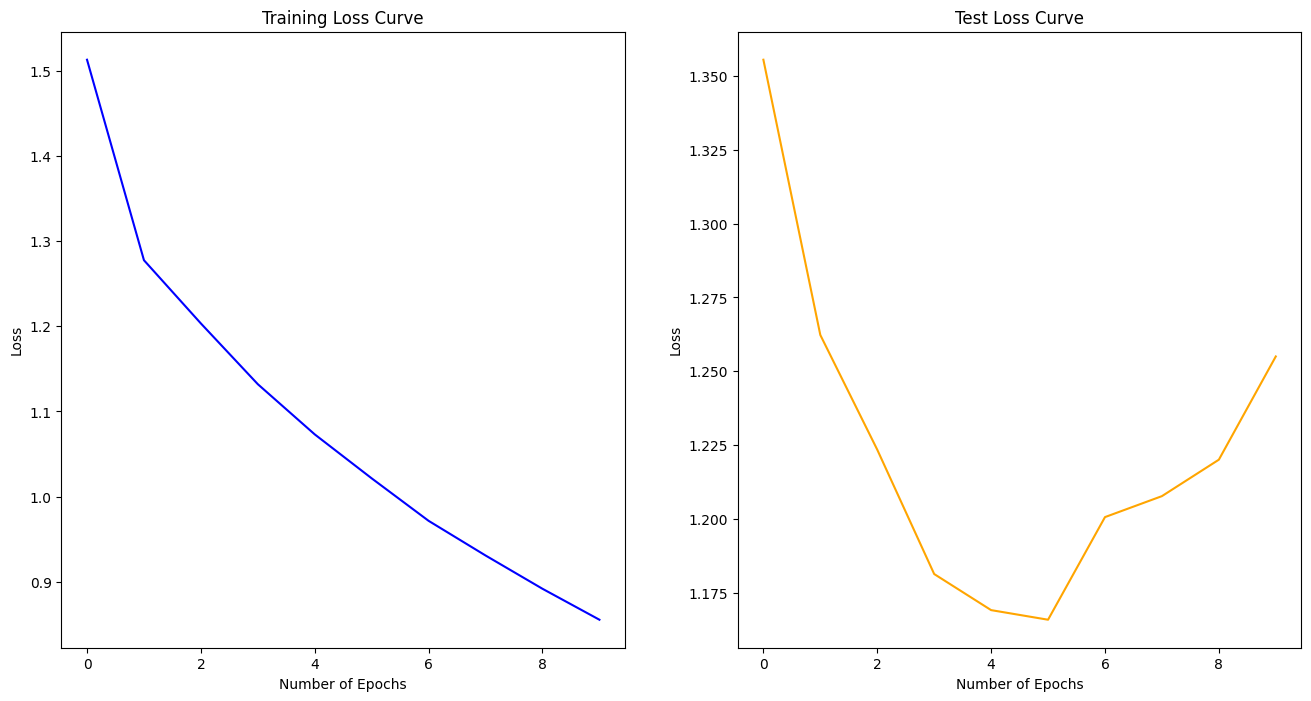

In [61]:
plot_loss_curves(train_losses=history_v1['train_losses'],
                 test_losses=history_v1['test_losses'])

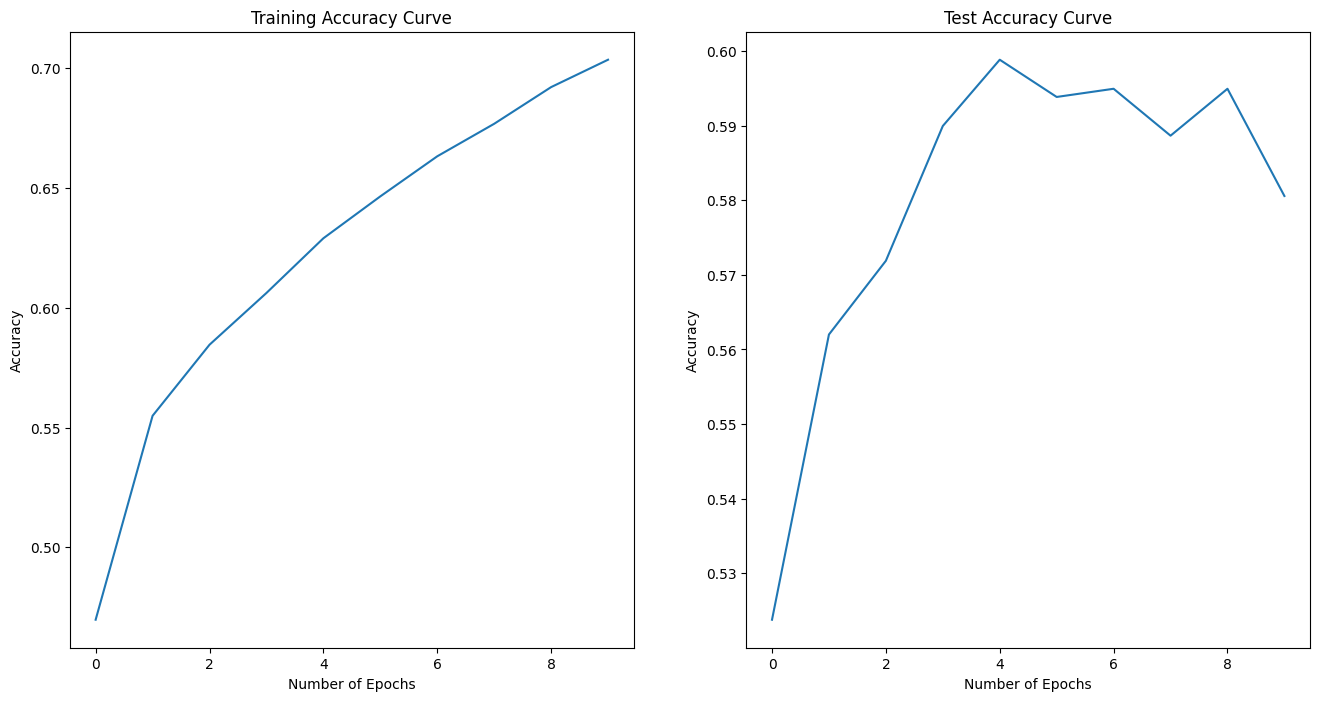

In [63]:
plot_accuracy_curves(train_accuracies=history_v1['train_accuracies'],
                     test_accuracies=history_v1['test_accuracies'])

In [64]:
from eval import eval_model

In [66]:
model_v5_1.load_state_dict(history_v1['best_state_dict'])

<All keys matched successfully>

In [67]:
eval_model(model=model_v5_1,
           dataloader=train_dataloader,
           loss_fn=nn.CrossEntropyLoss(),
           device=device)

(0.7732599973678589, 0.7325855493545532)

In [68]:
eval_model(model=model_v5_1,
           dataloader=test_dataloader,
           loss_fn=nn.CrossEntropyLoss(),
           device=device)

(1.255015254020691, 0.5805710554122925)